In [18]:
import visual_behavior_glm.GLM_visualization_tools as gvt
import visual_behavior_glm.GLM_analysis_tools as gat
from visual_behavior.data_access import loading
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
pd.set_option('display.max_columns', 500)

In [5]:
versions = ['12_events_L2_optimize_by_session', '12_dff_L2_optimize_by_session', '10c_L2_optimize_by_session', '11c_L2_optimize_by_session']

In [6]:
results = {}
for version in versions:
    results[version] = gat.retrieve_results({'glm_version':version})

In [7]:
for version in versions:
    print(version)
    print(results[version]['Full__avg_cv_var_test'].describe())
    print('')

12_events_L2_optimize_by_session
count    66225.000000
mean         0.026050
std          0.063758
min          0.000000
25%          0.000000
50%          0.000219
75%          0.020603
max          0.798521
Name: Full__avg_cv_var_test, dtype: float64

12_dff_L2_optimize_by_session
count    66253.000000
mean         0.043513
std          0.079483
min          0.000000
25%          0.002868
50%          0.015082
75%          0.045829
max          0.854457
Name: Full__avg_cv_var_test, dtype: float64

10c_L2_optimize_by_session
count    85410.000000
mean         0.054240
std          0.083632
min          0.000000
25%          0.009274
50%          0.024295
75%          0.061113
max          0.885237
Name: Full__avg_cv_var_test, dtype: float64

11c_L2_optimize_by_session
count    89369.000000
mean         0.033199
std          0.064705
min          0.000000
25%          0.002870
50%          0.010913
75%          0.032089
max          0.781883
Name: Full__avg_cv_var_test, dtype: float64


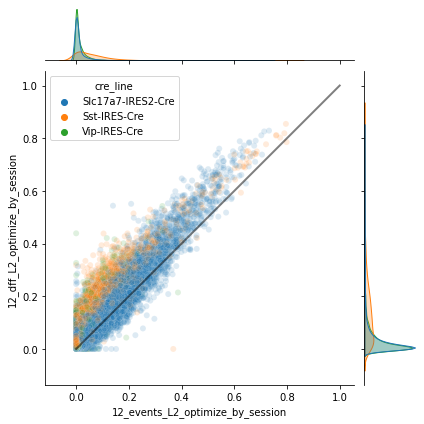

In [8]:
gvt.plot_glm_version_comparison(versions_to_compare=['12_events_L2_optimize_by_session', '12_dff_L2_optimize_by_session'],savefig=False)

In [9]:
import seaborn as sns
from seaborn_qqplot import pplot

In [14]:
data = pd.merge(
    results['12_events_L2_optimize_by_session'],
    results['12_dff_L2_optimize_by_session'],
    left_on='cell_roi_id',
    right_on='cell_roi_id',
    how='inner'
)
data

,_id_x,cell_specimen_id_x,Full__avg_cv_var_train_x,Full__avg_cv_var_test_x,Full__avg_cv_var_test_full_comparison_x,Full__avg_cv_adjvar_train_x,Full__avg_cv_adjvar_test_x,Full__avg_cv_adjvar_test_full_comparison_x,Full__absolute_change_from_full_x,Full__adj_dropout_x,Full__dropout_x,intercept__avg_cv_var_train_x,intercept__avg_cv_var_test_x,intercept__avg_cv_var_test_full_comparison_x,intercept__avg_cv_adjvar_train_x,intercept__avg_cv_adjvar_test_x,intercept__avg_cv_adjvar_test_full_comparison_x,intercept__absolute_change_from_full_x,intercept__adj_dropout_x,intercept__dropout_x,time__avg_cv_var_train_x,time__avg_cv_var_test_x,time__avg_cv_var_test_full_comparison_x,time__avg_cv_adjvar_train_x,time__avg_cv_adjvar_test_x,time__avg_cv_adjvar_test_full_comparison_x,time__absolute_change_from_full_x,time__adj_dropout_x,time__dropout_x,omissions__avg_cv_var_train_x,omissions__avg_cv_var_test_x,omissions__avg_cv_var_test_full_comparison_x,omissions__avg_cv_adjvar_train_x,omissions__avg_cv_adjvar_test_x,omissions__avg_cv_adjvar_test_full_comparison_x,omissions__absolute_change_from_full_x,omissions__adj_dropout_x,omissions__dropout_x,running__avg_cv_var_train_x,running__avg_cv_var_test_x,running__avg_cv_var_test_full_comparison_x,running__avg_cv_adjvar_train_x,running__avg_cv_adjvar_test_x,running__avg_cv_adjvar_test_full_comparison_x,running__absolute_change_from_full_x,running__adj_dropout_x,running__dropout_x,pupil__avg_cv_var_train_x,pupil__avg_cv_var_test_x,pupil__avg_cv_var_test_full_comparison_x,pupil__avg_cv_adjvar_train_x,pupil__avg_cv_adjvar_test_x,pupil__avg_cv_adjvar_test_full_comparison_x,pupil__absolute_change_from_full_x,pupil__adj_dropout_x,pupil__dropout_x,face_motion_PC_0__avg_cv_var_train_x,face_motion_PC_0__avg_cv_var_test_x,face_motion_PC_0__avg_cv_var_test_full_comparison_x,face_motion_PC_0__avg_cv_adjvar_train_x,face_motion_PC_0__avg_cv_adjvar_test_x,face_motion_PC_0__avg_cv_adjvar_test_full_comparison_x,face_motion_PC_0__absolute_change_from_full_x,face_motion_PC_0__adj_dropout_x,face_motion_PC_0__dropout_x,face_motion_PC_1__avg_cv_var_train_x,face_motion_PC_1__avg_cv_var_test_x,face_motion_PC_1__avg_cv_var_test_full_comparison_x,face_motion_PC_1__avg_cv_adjvar_train_x,face_motion_PC_1__avg_cv_adjvar_test_x,face_motion_PC_1__avg_cv_adjvar_test_full_comparison_x,face_motion_PC_1__absolute_change_from_full_x,face_motion_PC_1__adj_dropout_x,face_motion_PC_1__dropout_x,face_motion_PC_2__avg_cv_var_train_x,face_motion_PC_2__avg_cv_var_test_x,face_motion_PC_2__avg_cv_var_test_full_comparison_x,face_motion_PC_2__avg_cv_adjvar_train_x,face_motion_PC_2__avg_cv_adjvar_test_x,face_motion_PC_2__avg_cv_adjvar_test_full_comparison_x,face_motion_PC_2__absolute_change_from_full_x,face_motion_PC_2__adj_dropout_x,face_motion_PC_2__dropout_x,face_motion_PC_3__avg_cv_var_train_x,face_motion_PC_3__avg_cv_var_test_x,face_motion_PC_3__avg_cv_var_test_full_comparison_x,face_motion_PC_3__avg_cv_adjvar_train_x,face_motion_PC_3__avg_cv_adjvar_test_x,face_motion_PC_3__avg_cv_adjvar_test_full_comparison_x,face_motion_PC_3__absolute_change_from_full_x,face_motion_PC_3__adj_dropout_x,face_motion_PC_3__dropout_x,face_motion_PC_4__avg_cv_var_train_x,face_motion_PC_4__avg_cv_var_test_x,face_motion_PC_4__avg_cv_var_test_full_comparison_x,face_motion_PC_4__avg_cv_adjvar_train_x,face_motion_PC_4__avg_cv_adjvar_test_x,face_motion_PC_4__avg_cv_adjvar_test_full_comparison_x,face_motion_PC_4__absolute_change_from_full_x,face_motion_PC_4__adj_dropout_x,face_motion_PC_4__dropout_x,image0__avg_cv_var_train_x,image0__avg_cv_var_test_x,image0__avg_cv_var_test_full_comparison_x,image0__avg_cv_adjvar_train_x,image0__avg_cv_adjvar_test_x,image0__avg_cv_adjvar_test_full_comparison_x,image0__absolute_change_from_full_x,image0__adj_dropout_x,image0__dropout_x,image1__avg_cv_var_train_x,image1__avg_cv_var_test_x,image1__avg_cv_var_test_full_comparison_x,image1__avg_cv_adjvar_train_x,image1__avg_cv_adjvar_test_x,image1__avg_cv_adjvar_test_full_comparison_x,image1_

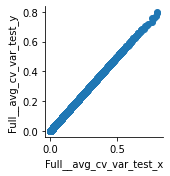

In [17]:
pplot(
    data.sort_values(by='Full__avg_cv_var_test_x'),
    x='Full__avg_cv_var_test_x',
    y='Full__avg_cv_var_test_y',
)

In [11]:
results['12_events_L2_optimize_by_session'][['cell_roi_id']]

,cell_roi_id
0,1080861991
1,1080861992
2,1080861995
3,1080861999
4,1080862003
...,...
66248,1080853037
66249,1080853042
66250,1080853054
66251,1080853058


In [21]:
session_output = pd.read_csv('/allen/programs/braintv/workgroups/nc-ophys/alex.piet/behavior/model_output/775378326.csv')
session_output

,stimulus_presentations_id,image_index,image_name,omitted,change,licked,licking_bout_start,licking_bout_end,lick_rate,rewarded,reward_rate,lick_bout_rate,rewarded_lick_bout,hit_fraction,hit_rate,miss_rate,false_alarm_rate,correct_reject_rate,d_prime,criterion,high_lick_state,high_reward_state,flash_metrics_epochs,flash_metrics_labels,in_licking_bout,bias,omissions,omissions1,task0,timing1D,engaged
0,0,0,im065,False,False,1,True,False,1.333333,0,0.0000,1.333333,0.0,0.000000,0.0,0.0,1.000000,0.000000,-4.652696,0.000000,True,False,2,"high-lick,low-reward",0,-1.652530,0.943901,-1.261907,0.871167,0.475961,True
1,1,0,im065,False,False,1,False,True,1.333333,0,0.0000,1.000000,0.0,0.000000,0.0,0.0,0.750000,0.250000,-3.000838,-0.825929,True,False,2,"high-lick,low-reward",1,-1.652530,0.943901,-1.261907,0.871167,0.475961,True
2,2,0,im065,False,False,0,False,False,1.185185,0,0.0000,0.740741,0.0,0.000000,0.0,0.0,0.555556,0.444444,-2.466058,-1.093319,True,False,2,"high-lick,low-reward",0,-1.687405,0.943901,-1.261871,0.871168,0.507209,True
3,3,0,im065,False,False,0,False,False,1.000000,0,0.0000,0.583333,0.0,0.000000,0.0,0.0,0.437500,0.562500,-2.169037,-1.241829,True,False,2,"high-lick,low-reward",0,-1.716490,0.943901,-1.261847,0.871170,0.533285,True
4,4,0,im065,False,False,0,False,False,0.853333,0,0.0000,0.480000,0.0,0.000000,0.0,0.0,0.360000,0.640000,-1.967889,-1.342403,True,False,2,"high-lick,low-reward",0,-1.739874,0.943901,-1.261833,0.871171,0.555030,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4786,4786,3,im061,False,False,1,True,False,0.478125,0,0.0025,0.345182,0.0,0.007243,1.0,0.0,0.257495,0.742505,2.977437,0.837629,True,False,2,"high-lick,low-reward",0,-0.022300,0.971690,-1.419214,1.083268,0.150098,True
4787,4787,3,im061,False,False,1,False,True,0.476354,0,0.0025,0.344583,0.0,0.007255,1.0,0.0,0.257044,0.742956,2.978832,0.836932,True,False,2,"high-lick,low-reward",1,-0.022300,0.971690,-1.419214,1.083268,0.150098,True
4788,4788,3,im061,False,False,0,False,False,0.474557,0,0.0025,0.343958,0.0,0.007268,1.0,0.0,0.256575,0.743425,2.980289,0.836203,True,False,2,"high-lick,low-reward",0,-0.021445,0.971690,-1.419215,1.083268,0.152084,True
4789,4789,3,im061,False,False,1,True,False,0.472760,0,0.0025,0.343359,0.0,0.007281,1.0,0.0,0.256125,0.743875,2.981687,0.835504,True,False,2,"high-lick,low-reward",0,-0.000853,0.971690,-1.419254,1.083267,0.136442,True
